In [1]:
# @title Default title text
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# @title Default title text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
# @title Default title text
# Change path according to your file location
file_path = "/content/drive/MyDrive/ExploratoryDataAnalysis/titanic.csv"
df = pd.read_csv(file_path)

# Basic info
print("Shape:", df.shape)
print("\nInfo:\n", df.info())
print("\nFirst 5 rows:\n", df.head())


Shape: (714, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   name      714 non-null    object 
 3   sex       714 non-null    object 
 4   age       714 non-null    float64
 5   fare      714 non-null    float64
 6   sibsp     714 non-null    int64  
 7   parch     714 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 44.8+ KB

Info:
 None

First 5 rows:
    survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3         

In [4]:
# @title Default title text
# Summary statistics
print(df.describe(include='all'))

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types
print("\nData Types:\n", df.dtypes)

# Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


          survived      pclass                 name   sex         age  \
count   714.000000  714.000000                  714   714  714.000000   
unique         NaN         NaN                  714     2         NaN   
top            NaN         NaN  Dooley, Mr. Patrick  male         NaN   
freq           NaN         NaN                    1   453         NaN   
mean      0.406162    2.236695                  NaN   NaN   29.699118   
std       0.491460    0.838250                  NaN   NaN   14.526497   
min       0.000000    1.000000                  NaN   NaN    0.420000   
25%       0.000000    1.000000                  NaN   NaN   20.125000   
50%       0.000000    2.000000                  NaN   NaN   28.000000   
75%       1.000000    3.000000                  NaN   NaN   38.000000   
max       1.000000    3.000000                  NaN   NaN   80.000000   

              fare       sibsp       parch  
count   714.000000  714.000000  714.000000  
unique         NaN         NaN   

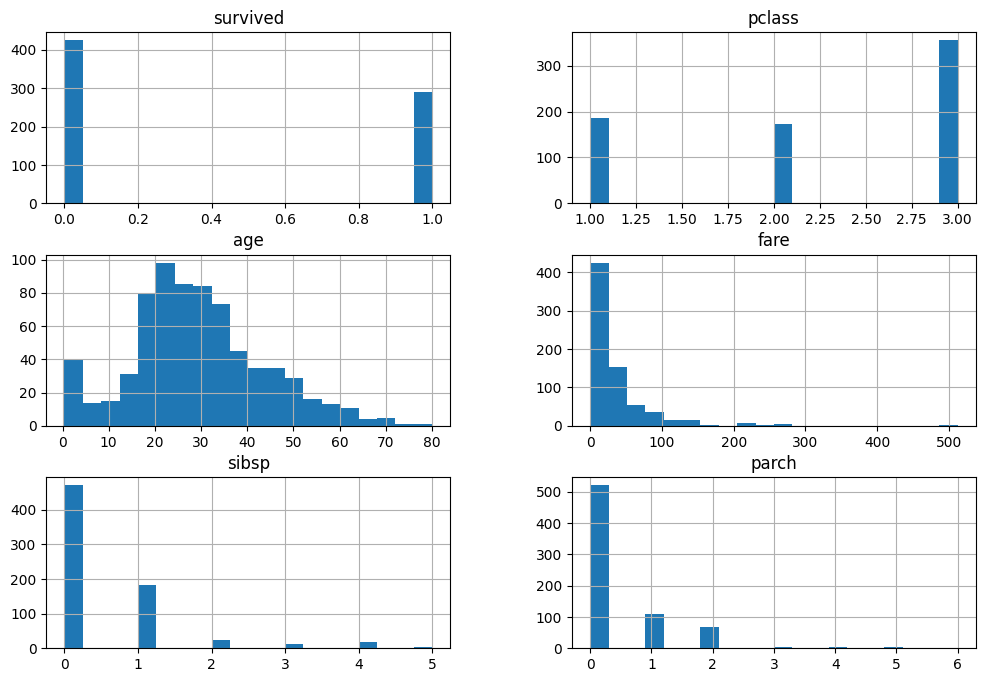

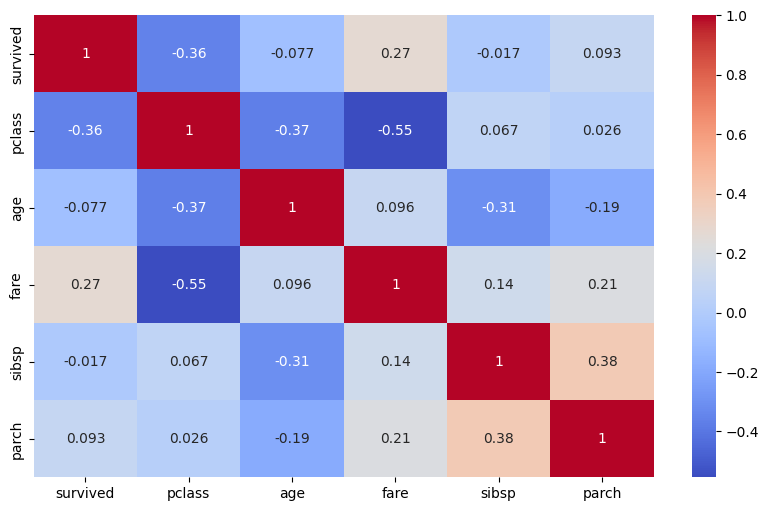

In [5]:
# @title Default title text
# Histogram for numeric columns
df.hist(bins=20, figsize=(12,8))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

# Example categorical vs target (Titanic: Survived vs Sex)
if 'Survived' in df.columns and 'Sex' in df.columns:
    sns.countplot(x='Survived', hue='Sex', data=df)
    plt.show()


In [6]:
# @title Default title text
# Boxplot example (change column name as needed)
if 'Age' in df.columns:
    sns.boxplot(x=df['Age'])
    plt.show()


In [7]:
# @title Default title text
# Example: Chi-square test between Sex and Survived
if 'Survived' in df.columns and 'Sex' in df.columns:
    chi2, p, dof, expected = stats.chi2_contingency(
        pd.crosstab(df['Sex'], df['Survived'])
    )
    print("Chi-square test p-value:", p)
